In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

# Default Bank Data.

In [2]:
#bank_data = pd.read_excel('./bank/default_data.xls', sep=';', header=1)

data_path='C:/Users/xg16060/OneDrive - APG/dev_data/interestProfile/'
bank_data = pd.read_csv(data_path+'orange_small_train.data', sep='\t')#D2
bank_data_label = pd.read_csv(data_path+'orange_small_train_churn.labels', header=None)

#bank_data = pd.read_csv('./orange_small_train.data/orange_small_train.data', sep='\t')
#bank_data_label = pd.read_csv('./orange_small_train.data/orange_small_train_churn.labels.txt', header=None)

bank_data['label'] = bank_data_label

bank_data.describe()

del bank_data['Var185']

del bank_data['Var209']

del bank_data['Var230']

del bank_data['Var8']


#bank_data= bank_data.iloc[:,1:]
bank_data.tail()

bank_data_label

,0
0,-1
1,1
2,-1
3,-1
4,-1
...,...
49995,-1
49996,-1
49997,-1
49998,-1


In [3]:
grouped = bank_data.groupby('label').mean()


#df['three'] = df.groupby(['one','two'], sort=False)['three']
#                .apply(lambda x: x.fillna(x.mean()))
#print (df)

neg=grouped.loc[-1]
pos =grouped.loc[1]
for i in grouped.columns:
    bank_data[i] =bank_data.groupby('label')[i].apply(lambda x: x.fillna(0))
    #bank_data[bank_data['label']==-1][i]=bank_data[bank_data['label']==-1][i].fillna(neg[i])

bank_data

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,label
0,0.0,0.0,0.0,0.0,0.0,1526.0,7.0,0.0,0.0,0.0,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,-1
1,0.0,0.0,0.0,0.0,0.0,525.0,0.0,0.0,0.0,0.0,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,1
2,0.0,0.0,0.0,0.0,0.0,5236.0,7.0,0.0,0.0,0.0,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,-1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,-1
4,0.0,0.0,0.0,0.0,0.0,1029.0,7.0,0.0,0.0,0.0,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,357.0,0.0,0.0,0.0,0.0,...,oslk,EROH7Cg,LM8l689qOp,NaN,NaN,7FJQ,RAYp,F2FyR07IdsN7I,NaN,-1
49996,0.0,0.0,0.0,0.0,0.0,1078.0,0.0,0.0,0.0,0.0,...,oslk,GfSQowC,LM8l689qOp,NaN,kG3k,FSa2,RAYp,55YFVY9,am7c,-1
49997,0.0,0.0,0.0,0.0,0.0,2807.0,7.0,0.0,0.0,0.0,...,oslk,dh6qI2t,LM8l689qOp,NaN,ELof,fKCe,RAYp,TCU50_Yjmm6GIBZ0lL_,NaN,-1
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,oslk,2fF2Oqu,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,-1


In [4]:
sum(bank_data.dtypes!='object')
bank_data['label'].value_counts()

-1    46328
 1     3672
Name: label, dtype: int64

In [5]:
bank_data.fillna('unknown', inplace=True)
bank_data

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,label
0,0.0,0.0,0.0,0.0,0.0,1526.0,7.0,0.0,0.0,0.0,...,oslk,fXVEsaq,jySVZNlOJy,unknown,unknown,xb3V,RAYp,F2FyR07IdsN7I,unknown,-1
1,0.0,0.0,0.0,0.0,0.0,525.0,0.0,0.0,0.0,0.0,...,oslk,2Kb5FSF,LM8l689qOp,unknown,unknown,fKCe,RAYp,F2FyR07IdsN7I,unknown,1
2,0.0,0.0,0.0,0.0,0.0,5236.0,7.0,0.0,0.0,0.0,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,unknown,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,-1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,oslk,CE7uk3u,LM8l689qOp,unknown,unknown,FSa2,RAYp,F2FyR07IdsN7I,unknown,-1
4,0.0,0.0,0.0,0.0,0.0,1029.0,7.0,0.0,0.0,0.0,...,oslk,1J2cvxe,LM8l689qOp,unknown,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,357.0,0.0,0.0,0.0,0.0,...,oslk,EROH7Cg,LM8l689qOp,unknown,unknown,7FJQ,RAYp,F2FyR07IdsN7I,unknown,-1
49996,0.0,0.0,0.0,0.0,0.0,1078.0,0.0,0.0,0.0,0.0,...,oslk,GfSQowC,LM8l689qOp,unknown,kG3k,FSa2,RAYp,55YFVY9,am7c,-1
49997,0.0,0.0,0.0,0.0,0.0,2807.0,7.0,0.0,0.0,0.0,...,oslk,dh6qI2t,LM8l689qOp,unknown,ELof,fKCe,RAYp,TCU50_Yjmm6GIBZ0lL_,unknown,-1
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,oslk,2fF2Oqu,LM8l689qOp,unknown,unknown,FSa2,RAYp,F2FyR07IdsN7I,unknown,-1


In [6]:
grouped.columns

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var9', 'Var10',
       'Var11',
       ...
       'Var180', 'Var181', 'Var182', 'Var183', 'Var184', 'Var186', 'Var187',
       'Var188', 'Var189', 'Var190'],
      dtype='object', length=188)

In [7]:
import numpy as np

#bank_data = pd.read_csv('./adult.data', sep=',' ,header=None) CENSUS DATA

y = bank_data.iloc[:,-1]

#student_data = student_data.iloc[:,0:-1]
bank_data = bank_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
bank_data.replace('?',np.nan,inplace=True)

bank_data.dropna(inplace=True)
bank_data= bank_data[(bank_data=='?')==False]



C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [8]:
y.value_counts()

-1    46328
 1     3672
Name: label, dtype: int64

In [9]:

bank_data.dropna(inplace=True)
sum(bank_data.dtypes=='object')

print(bank_data.columns[bank_data.dtypes=='object'])

del bank_data['Var15']

del bank_data['Var20']

del bank_data['Var31']

del bank_data['Var32']

del bank_data['Var39']

del bank_data['Var42']

del bank_data['Var48']

del bank_data['Var52']

del bank_data['Var55']

del bank_data['Var79']

del bank_data['Var141']

del bank_data['Var167']

del bank_data['Var169']

del bank_data['Var175']

Index(['Var191', 'Var192', 'Var193', 'Var194', 'Var195', 'Var196', 'Var197',
       'Var198', 'Var199', 'Var200', 'Var201', 'Var202', 'Var203', 'Var204',
       'Var205', 'Var206', 'Var207', 'Var208', 'Var210', 'Var211', 'Var212',
       'Var213', 'Var214', 'Var215', 'Var216', 'Var217', 'Var218', 'Var219',
       'Var220', 'Var221', 'Var222', 'Var223', 'Var224', 'Var225', 'Var226',
       'Var227', 'Var228', 'Var229'],
      dtype='object')


In [10]:
object_columns = list(bank_data.columns[bank_data.dtypes=='object'])

object_columns

['Var191',
 'Var192',
 'Var193',
 'Var194',
 'Var195',
 'Var196',
 'Var197',
 'Var198',
 'Var199',
 'Var200',
 'Var201',
 'Var202',
 'Var203',
 'Var204',
 'Var205',
 'Var206',
 'Var207',
 'Var208',
 'Var210',
 'Var211',
 'Var212',
 'Var213',
 'Var214',
 'Var215',
 'Var216',
 'Var217',
 'Var218',
 'Var219',
 'Var220',
 'Var221',
 'Var222',
 'Var223',
 'Var224',
 'Var225',
 'Var226',
 'Var227',
 'Var228',
 'Var229']

In [11]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import *
from sklearn.tree import DecisionTreeClassifier
# import labelencoder
from sklearn.preprocessing import LabelEncoder, StandardScaler# instantiate labelencoder object
from sklearn.ensemble import RandomTreesEmbedding, RandomForestClassifier


le = LabelEncoder()



from sklearn.preprocessing import LabelEncoder
le_dict = {col: LabelEncoder() for col in object_columns }

for col in object_columns:
    bank_data[col] = le_dict[col].fit_transform(bank_data[col])
    
    


#iris = load_breast_cancer()
#X = bank_data.iloc[:,1:-1]
X = bank_data.iloc[:,0:-1]

#y = bank_data.iloc[:,-1]#(student_data['target']=='ad.').apply(int)
y = (bank_data.iloc[:,-1]==1).apply(int) #(student_data['target']=='ad.').apply(int)

#y = (bank_data.iloc[:,-1]=='yes').apply(int) #(student_data['target']=='ad.').apply(int)


#label encoding.

#le_dict[col].transform(df_another[col])


#X = pd.get_dummies(X, prefix_sep='_', drop_first=True) #One hot encoding, assuming complet knowledge of vocabulary

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0 ,test_size=0.4 )

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=0 ,test_size=0.8 )

In [12]:
X_train
X_test
X_val

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229
43414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,978,4,1529,0,1,2,5,2,8,4
42944,0.0,0.0,0.0,0.0,0.0,4410.0,7.0,0.0,0.0,0.0,...,2446,4,278,4,1,2,9,2,8,4
17703,0.0,0.0,0.0,0.0,0.0,847.0,7.0,0.0,0.0,0.0,...,71,4,1457,0,1,0,19,2,8,1
40208,0.0,0.0,0.0,0.0,0.0,1799.0,7.0,0.0,0.0,0.0,...,3875,4,2676,0,1,0,4,2,8,0
20490,0.0,0.0,0.0,0.0,0.0,42.0,7.0,0.0,0.0,0.0,...,350,6,2751,0,1,2,21,3,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.0,0.0,0.0,0.0,0.0,847.0,7.0,0.0,0.0,0.0,...,3455,4,2659,0,1,3,14,2,2,0
40919,0.0,0.0,0.0,0.0,0.0,2639.0,7.0,0.0,0.0,0.0,...,4191,4,1101,1,1,1,7,2,8,0
43783,0.0,0.0,0.0,0.0,0.0,1302.0,7.0,0.0,0.0,0.0,...,1583,4,2948,0,1,0,15,2,14,1
46801,0.0,0.0,0.0,0.0,0.0,504.0,0.0,0.0,0.0,0.0,...,1605,4,3776,0,1,2,17,2,8,4


In [13]:
features = np.shape(X_train)[1]
features

212

In [18]:
y.value_counts()

0    46328
1     3672
Name: label, dtype: int64

# Visualization of Decision Tree

# GRID SEARCHES with Node Transformer

In [15]:
%load_ext autoreload
%autoreload 2

In [16]:
seq_number = 50
depth = 6
dimension = 50

In [17]:
# example of usage of NodeTransformer
from NodeTransformer import NodeTransformer




ndt = NodeTransformer(mode = 'Extended', n_estimators=seq_number,dimension=dimension, max_depth=depth, random_state = 0)


ndt.fit(X_train,y_train)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.35it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 37.01it/s]


Computing transition probabilities:   0%|          | 0/109 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.27it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 34.55it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.78it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 34.11it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 31.65it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 38.61it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 40.82it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 46.59it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 27.03it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 30.85it/s]


Computing transition probabilities:   0%|          | 0/103 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 25.77it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 31.10it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 26.54it/s]


Computing transition probabilities:   0%|          | 0/43 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.35it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 29.66it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 35.84it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 34.89it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:02<00:00, 23.84it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 36.60it/s]


Computing transition probabilities:   0%|          | 0/97 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 29.55it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.41it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 30.72it/s]


Computing transition probabilities:   0%|          | 0/75 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 39.27it/s]


Computing transition probabilities:   0%|          | 0/91 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 36.43it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 32.23it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 36.62it/s]


Computing transition probabilities:   0%|          | 0/65 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.28it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 32.82it/s]


Computing transition probabilities:   0%|          | 0/71 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.99it/s]


Computing transition probabilities:   0%|          | 0/77 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.35it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 36.01it/s]


Computing transition probabilities:   0%|          | 0/81 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 30.35it/s]


Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 40.98it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.14it/s]


Computing transition probabilities:   0%|          | 0/83 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.67it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 30.28it/s]


Computing transition probabilities:   0%|          | 0/85 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 46.86it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 42.90it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.39it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 36.28it/s]


Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 45.36it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 44.85it/s]


Computing transition probabilities:   0%|          | 0/113 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 28.89it/s]


Computing transition probabilities:   0%|          | 0/89 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 28.40it/s]


Computing transition probabilities:   0%|          | 0/99 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:02<00:00, 24.82it/s]


Computing transition probabilities:   0%|          | 0/87 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 41.04it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 33.37it/s]


Computing transition probabilities:   0%|          | 0/95 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 34.29it/s]


NodeTransformer(dimension=50, impurity_reweight=True, max_depth=6,
        mode='Extended', n_estimators=50, n_walks=50, random_state=0,
        walk_length=5, window=5)

In [18]:
X_train_transformed = ndt.transform_matrix(X_train)

print(np.shape(X_train_transformed))

X_test_transformed = ndt.transform_matrix(X_test)
X_val_transformed = ndt.transform_matrix(X_val)

0it [00:00, ?it/s]

(30000, 50, 50)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [19]:

X_train_transformed = np.transpose(X_train_transformed, (0, 2, 1))
X_test_transformed = np.transpose(X_test_transformed, (0, 2, 1))
X_val_transformed = np.transpose(X_val_transformed, (0, 2, 1))

print(np.shape(X_train_transformed))
print(np.shape(X_test_transformed))

(30000, 50, 50)
(16000, 50, 50)


In [20]:
X_train_transformed[0,2:7,:]

array([[ 1.06295988e-01, -3.62171233e-01,  4.55998629e-01,
        -5.81020892e-01,  5.68549871e-01, -5.92480183e-01,
         2.61863828e-01,  3.78360808e-01, -6.05154224e-02,
         2.62146175e-01,  3.65929335e-01, -5.08593678e-01,
         8.16382825e-01,  3.09530526e-01,  1.64231107e-01,
        -2.30956867e-01,  1.46459248e-02,  5.04863560e-01,
        -4.17871773e-01,  5.85293591e-01,  2.05311045e-01,
        -6.27956748e-01,  1.97766632e-01,  2.06442863e-01,
        -7.07538486e-01, -2.72180796e-01,  3.29702944e-01,
        -5.42601058e-03,  3.81323606e-01, -1.85779650e-02,
         5.41864991e-01,  4.12445962e-01, -4.11917269e-01,
         3.16402018e-02, -8.69016290e-01,  2.72549510e-01,
         7.73293793e-01, -1.65222362e-01,  1.18487135e-01,
         3.26943487e-01, -2.59658009e-01,  5.90325773e-01,
        -3.70863872e-03, -2.78041780e-01,  6.12864256e-01,
         1.34770796e-01, -3.39573354e-01, -2.48116225e-01,
        -3.80305499e-01, -1.24309294e-01],
       [-5.65

In [21]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from tqdm import tqdm_notebook as tqdm
import pickle



param_grid = {'rfne__n_estimators':[50, 100, 200],
                   'rfne__max_depth':[5],'rfne__dimension' : [10]}

grid_results = []


for i,ii in tqdm(enumerate(param_grid['rfne__n_estimators'])):
    for j,jj in enumerate(param_grid['rfne__max_depth']):
        for k,kk in enumerate(param_grid['rfne__dimension']):
            
            scoring = {'auc': make_scorer(roc_auc_score)}
            estimators = [('scale', StandardScaler()), ('rfne', NodeTransformer(n_estimators=ii,max_depth=jj,dimension=kk)), ('logreg',LogisticRegression())]

            pipe = Pipeline(estimators)
            auc = cross_validate(pipe,X_train,y_train, cv=10, scoring ='roc_auc', n_jobs = 4, verbose=2 )
            auc['pars'] = [ii,jj,kk]
            print(auc)
            grid_results.append(auc)
            pickle.dump(grid_results, open('grid_res_default.pkl','wb'))


C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\ipykernel_launcher.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_j

{'fit_time': array([854.78643084, 856.68043303, 870.87247443, 854.47443366,
       191.07974029, 176.96490049, 182.82660198, 171.19016886,
        87.3293221 ,  87.9573555 ]), 'score_time': array([6.00551271, 5.9485116 , 6.00606132, 6.01651239, 4.89551163,
       5.53762484, 4.91414666, 5.01853585, 3.32949185, 2.67465663]), 'test_score': array([0.68231432, 0.71786189, 0.6744747 , 0.71189094, 0.70425285,
       0.67911736, 0.65950148, 0.69957231, 0.70421177, 0.71547046]), 'train_score': array([0.78402146, 0.77655946, 0.77803332, 0.78365329, 0.78044962,
       0.77293245, 0.77579827, 0.7701347 , 0.77315705, 0.77845604]), 'pars': [50, 5, 10]}


C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 19.5min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() i

{'fit_time': array([394.8832221 , 413.64321923, 396.17322326, 399.02218652,
       326.30891752, 317.31387091, 322.10291553, 320.43826294,
       178.87992764, 178.11498928]), 'score_time': array([10.88599992, 11.55200148, 10.61500001, 10.45999765, 10.65385842,
       10.51290345, 10.19085526, 10.68051338,  6.47306395,  6.17106724]), 'test_score': array([0.6854229 , 0.73167431, 0.67312654, 0.69225335, 0.69272264,
       0.67850862, 0.66525156, 0.6838479 , 0.70212009, 0.70372895]), 'train_score': array([0.81634247, 0.81347353, 0.81767332, 0.8158064 , 0.81687084,
       0.81283234, 0.81089754, 0.80946669, 0.81391295, 0.81186739]), 'pars': [100, 5, 10]}


C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 48.1min finished


{'fit_time': array([844.81913733, 859.64422536, 861.14321971, 821.11753964,
       817.50109911, 807.7639339 , 791.70891929, 832.18015718,
       497.50303197, 480.09417844]), 'score_time': array([28.14653611, 27.65601325, 27.47301292, 28.34166145, 29.80619574,
       29.26504755, 30.08104706, 31.83270168, 16.07961035, 15.90656209]), 'test_score': array([0.67605891, 0.7267172 , 0.65118026, 0.68152979, 0.68300781,
       0.67524696, 0.65338733, 0.67874064, 0.68786755, 0.70669774]), 'train_score': array([0.85794451, 0.86060256, 0.86476874, 0.86571571, 0.86222311,
       0.85905118, 0.85641903, 0.8600974 , 0.86076338, 0.86445412]), 'pars': [200, 5, 10]}


In [22]:
import pickle

pickle.dump(grid_results, open('grid_res.pkl','wb'))

In [23]:
grid_results


C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[{'fit_time': array([854.78643084, 856.68043303, 870.87247443, 854.47443366,
         191.07974029, 176.96490049, 182.82660198, 171.19016886,
          87.3293221 ,  87.9573555 ]),
  'score_time': array([6.00551271, 5.9485116 , 6.00606132, 6.01651239, 4.89551163,
         5.53762484, 4.91414666, 5.01853585, 3.32949185, 2.67465663]),
  'test_score': array([0.68231432, 0.71786189, 0.6744747 , 0.71189094, 0.70425285,
         0.67911736, 0.65950148, 0.69957231, 0.70421177, 0.71547046]),
  'train_score': array([0.78402146, 0.77655946, 0.77803332, 0.78365329, 0.78044962,
         0.77293245, 0.77579827, 0.7701347 , 0.77315705, 0.77845604]),
  'pars': [50, 5, 10]},
 {'fit_time': array([394.8832221 , 413.64321923, 396.17322326, 399.02218652,
         326.30891752, 317.31387091, 322.10291553, 320.43826294,
         178.87992764, 178.11498928]),
  'score_time': array([10.88599992, 11.55200148, 10.61500001, 10.45999765, 10.65385842,
         10.51290345, 10.19085526, 10.68051338,  6.47306395,  6

In [24]:
# for combination nodetransformer + logistic regression
for i in grid_results:
    m =np.mean(i['test_score'])
    std = np.std(i['test_score'])
    print(i['pars'],m, '+/-%f'%(std*1.96))
    

[50, 5, 10] 0.6948668092270441 +/-0.036735
[100, 5, 10] 0.6908656860580027 +/-0.034870
[200, 5, 10] 0.6820434206934731 +/-0.041602


# GRID Results Standard Algorithms

In [25]:
# Logistic
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from tqdm import tqdm_notebook as tqdm
import pickle


grid_resultsl =[]

for P in ['l1','l2']:
    estimatorsl = [('scale', StandardScaler()), ('rfne', LogisticRegression(penalty=P))]
    pipel = Pipeline(estimatorsl)
    auc = cross_validate(pipel,X_train,y_train, cv=10, scoring ='roc_auc', n_jobs = 4, verbose=2 )
    auc['pars'] = P
    grid_resultsl.append(auc) 
    #dump each iteration
    pickle.dump(grid_resultsl, open('grid_res_log_default.pkl','wb'))
    print(auc)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_j

{'fit_time': array([27.06106901, 22.13010597, 20.29398084, 32.50756359, 23.21186924,
       18.67845964, 31.71188474, 23.5877614 , 31.76837635, 24.75684857]), 'score_time': array([0.09301162, 0.06200552, 0.07900453, 0.08900666, 0.14301062,
       0.11400771, 0.12801075, 0.09401035, 0.02000117, 0.05400634]), 'test_score': array([0.62468914, 0.66392879, 0.61836725, 0.63892948, 0.6694685 ,
       0.61717507, 0.61201286, 0.63168438, 0.63492549, 0.64339248]), 'train_score': array([0.67141017, 0.6675388 , 0.67211912, 0.67014763, 0.66648938,
       0.67189661, 0.67299236, 0.66865275, 0.67033118, 0.66852277]), 'pars': 'l1'}


C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


{'fit_time': array([23.56522059, 24.71825075, 22.76919651, 24.81125617, 23.72725534,
       21.98520398, 22.53121948, 21.48218274, 13.270962  , 13.42648005]), 'score_time': array([0.33100796, 0.23700762, 0.1430037 , 0.06500435, 0.0750041 ,
       0.08300138, 0.05600166, 0.10200429, 0.03551507, 0.0300014 ]), 'test_score': array([0.6246426 , 0.6627319 , 0.61738979, 0.63804768, 0.67054069,
       0.61536971, 0.60967308, 0.62958434, 0.63463646, 0.64358962]), 'train_score': array([0.67204264, 0.66788846, 0.67251175, 0.67055389, 0.66700058,
       0.67244754, 0.673444  , 0.66897285, 0.67086161, 0.66883028]), 'pars': 'l2'}


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  1.0min finished


In [16]:
for i in grid_resultsl:
    m =np.mean(i['test_score'])
    std = np.std(i['test_score'])
    print(i['pars'],m, '+/-%f'%(std*1.96))

l1 0.6354558382301179 +/-0.035866
l2 0.6346205854820237 +/-0.037124


In [ ]:
# Knn
from sklearn.neighbors import KNeighborsClassifier
import pickle


grid_resultsk =[]

for k in range(1,11):
    estimatorsk = [('scale', StandardScaler()), ('rfne', KNeighborsClassifier(n_neighbors=k))]
    pipek = Pipeline(estimatorsk)
    auc = cross_validate(pipek,X_train,y_train, cv=10, scoring ='roc_auc', n_jobs = 4, verbose=2 )
    auc['pars'] = k
    grid_resultsk.append(auc) 
    #dump each iteration
    pickle.dump(grid_resultsk, open('grid_res_nn_default.pkl','wb'))
    print(auc)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  6.5min finished


{'fit_time': array([24.28382778, 23.42183042, 24.97983098, 24.52383065, 22.57900095,
       25.7592814 , 25.1602056 , 25.76928043, 15.08600068, 15.96099472]), 'score_time': array([112.32321525, 115.29222226, 113.99421144, 114.11021399,
       115.93276954, 116.12949109, 113.89356351, 115.61349535,
        96.29529405,  96.57185411]), 'test_score': array([0.51652123, 0.50345706, 0.49933614, 0.50040499, 0.5077408 ,
       0.5082794 , 0.50952779, 0.52817688, 0.52159163, 0.50594668]), 'pars': 1}


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  6.8min finished


{'fit_time': array([26.41212964, 28.57913136, 28.36813211, 28.2731328 , 22.11818743,
       22.79504943, 22.57305026, 21.96804738, 13.76187682, 12.52361512]), 'score_time': array([122.38184857, 125.15001798, 124.50601697, 124.08402514,
       121.39241147, 122.90249562, 120.15298152, 122.47410512,
        99.78970027, 100.520612  ]), 'test_score': array([0.52156319, 0.5131769 , 0.52346624, 0.50525657, 0.53070018,
       0.51491044, 0.51350591, 0.52151847, 0.52292365, 0.52717995]), 'pars': 2}


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  5.0min finished


{'fit_time': array([21.867908  , 22.00799942, 21.76684046, 21.72081137, 14.92088056,
       15.48295403, 15.62004709, 15.80515766,  8.43266344,  8.38995576]), 'score_time': array([127.95357823, 129.93306994, 129.49776459, 129.43288207,
        75.75656414,  76.47487879,  74.49598908,  74.99698114,
        46.97095156,  47.61550498]), 'test_score': array([0.53119118, 0.52310968, 0.53468331, 0.50967642, 0.53899545,
       0.52148052, 0.52003257, 0.51901241, 0.52634515, 0.53463492]), 'pars': 3}


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
for i in grid_resultsk:
    m =np.mean(i['test_score'])
    std = np.std(i['test_score'])
    print(i['pars'],m, '+/-%f'%(std*1.96))

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from tqdm import tqdm_notebook as tqdm
import pickle

param_grid_rf = {'rfne__n_estimators':[ 100, 200],
                   'rfne__max_depth':[ 10,15]}

grid_results_rf = []



for i,ii in tqdm(enumerate(param_grid_rf['rfne__n_estimators'])):
    for j,jj in enumerate(param_grid_rf['rfne__max_depth']):
            
            scoring = {'auc': make_scorer(roc_auc_score)}
            estimators_rf = [('scale', StandardScaler()), ('rf',RandomForestClassifier(n_estimators=ii,max_depth = jj))]

            pipe_rf = Pipeline(estimators_rf)
            auc = cross_validate(pipe_rf,X_train,y_train, cv=10, scoring ='roc_auc', n_jobs = 4, verbose=2 )
            auc['pars'] = [ii,jj]
            grid_results_rf.append(auc) 
            pickle.dump(grid_results_rf, open('grid_results_rf_default.pkl','wb'))
            print(auc)


In [ ]:
for i in grid_results_rf:
    m =np.mean(i['test_score'])
    std = np.std(i['test_score'])
    print(i['pars'],m, '+/-%f'%(std*1.96))

## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix ,make_scorer, roc_auc_score
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm_notebook as tqdm
import pickle

param_grid_svm = { 'C':[0.1,1,10],'kernel':['linear','rbf'],
             'gamma': [1, 0.1, 0.01]}

# param_grid_svm = { 'C':[0.1,1,100,1000],'kernel':['rbf','sigmoid','linear'],
#                   'gamma': [1, 0.1, 0.01, 0.001, 0.0001],}

grid_results_svm =[]
for i,ii in tqdm(enumerate(param_grid_svm['C'])):
    for j,jj in enumerate(param_grid_svm['kernel']):
        for w,ww in enumerate(param_grid_svm['gamma']):
            scoring = {'auc': make_scorer(roc_auc_score)}
            estimators_svm = [('scale', StandardScaler()), 
                             ('svm',SVC(C=ii, gamma=ww, kernel=jj, random_state=123))]

            pipe_svm = Pipeline(estimators_svm)
            auc = cross_validate(pipe_svm,X_train,y_train, cv=10, scoring ='roc_auc', n_jobs = 4, verbose=2 )
            auc['pars'] = [ii,jj,ww]
            grid_results_svm.append(auc) 
            pickle.dump(grid_results_svm, open('grid_results_svm_default.pkl','wb'))
            print(auc)

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_j

{'fit_time': array([ 819.64580894,  894.44323301, 1272.90620041,  951.13076377,
        836.47592783, 1639.09555602, 1095.76003718, 1270.40236998,
        786.78454638,  510.65172791]), 'score_time': array([22.16093636, 27.47752261, 29.3623147 , 25.94900775, 27.76193166,
       21.54300737, 25.96275759, 18.32964945, 17.77218342,  7.85200477]), 'test_score': array([0.51893078, 0.55406942, 0.57083084, 0.53698635, 0.59459396,
       0.47274853, 0.50813745, 0.53120489, 0.50130313, 0.54253542]), 'train_score': array([0.53566367, 0.56788987, 0.58539211, 0.5497342 , 0.55907105,
       0.53641257, 0.54877217, 0.56637095, 0.54943279, 0.54088667]), 'pars': [0.1, 'linear', 1]}


C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 48.7min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() i

{'fit_time': array([ 563.66178536,  615.60654783,  921.32769966,  662.82976222,
        746.94136524, 1550.37259841, 1014.37263083, 1249.73891139,
        848.78227544,  651.23168302]), 'score_time': array([16.34042573, 20.82638907, 27.20328259, 22.55324817, 24.96334004,
       31.23450923, 26.78054237, 28.15096521, 23.34636426,  8.20467567]), 'test_score': array([0.51893078, 0.55406942, 0.57083084, 0.53698635, 0.59459396,
       0.47274853, 0.50813745, 0.53120489, 0.50130313, 0.54253542]), 'train_score': array([0.53566367, 0.56788987, 0.58539211, 0.5497342 , 0.55907105,
       0.53641257, 0.54877217, 0.56637095, 0.54943279, 0.54088667]), 'pars': [0.1, 'linear', 0.1]}


C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 59.7min finished


{'fit_time': array([ 607.25134873,  692.06585598, 1074.28348231,  760.8407855 ,
        852.86283326, 1892.90502095, 1247.70647836, 1583.07745814,
       1029.42669106,  771.68077683]), 'score_time': array([26.11497998, 29.21633172, 28.18807602, 31.13924694, 32.64334536,
       33.49917555, 30.3581574 , 31.92525315, 25.11882281, 16.35906696]), 'test_score': array([0.51893078, 0.55406942, 0.57083084, 0.53698635, 0.59459396,
       0.47274853, 0.50813745, 0.53120489, 0.50130313, 0.54253542]), 'train_score': array([0.53566367, 0.56788987, 0.58539211, 0.5497342 , 0.55907105,
       0.53641257, 0.54877217, 0.56637095, 0.54943279, 0.54088667]), 'pars': [0.1, 'linear', 0.01]}


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


In [ ]:
for i in grid_results_svm:
    m =np.mean(i['test_score'])
    std = np.std(i['test_score'])
    print(i['pars'],m, '+/-%f'%(std*1.96))

## ANN with grid search

In [25]:
# 2 layers ANN model

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import  GridSearchCV,RepeatedStratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
import numpy as np
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

def create_model(learn_rate, momentum):
    #create a model
    model=Sequential()
    model.add(Dense(56,input_dim=212,activation='relu'))
    model.add(Dense(56,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    #compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

#creat a model
model=KerasClassifier(build_fn=create_model, verbose=0)

learn_rate = [0.001, 0.01, 0.1, 0.2]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8 ]

param_grid_ann=dict(learn_rate=learn_rate, momentum=momentum)

cv_sk = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)
grid=GridSearchCV(estimator=model, param_grid=param_grid_ann, n_jobs=-1,cv=cv_sk)
grid_result = grid.fit(X_train, y_train)



C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


In [18]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.928233 using {'learn_rate': 0.001, 'momentum': 0.2}
0.928222 (0.000142) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.928233 (0.000137) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.928233 (0.000137) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.928233 (0.000137) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.928233 (0.000137) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.928233 (0.000137) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.928233 (0.000137) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.928233 (0.000137) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.928233 (0.000137) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.928233 (0.000137) with: {'learn_rate': 0.01, 'momentum': 0.8}
0.928233 (0.000137) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.928233 (0.000137) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.928222 (0.000144) with: {'learn_rate': 0.1, 'momentum': 0.4}
0.928233 (0.000137) with: {'learn_rate': 0.1, 'momentum': 0.6}
0.928233 (0.000137) with: {'learn_rate': 0.

In [15]:
# 2 layers ANN model

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import  GridSearchCV,RepeatedStratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
import numpy as np
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

def create_model(learn_rate, momentum):
    #create a model
    model=Sequential()
    model.add(Dense(28,input_dim=212,activation='relu'))
    model.add(Dense(28,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    #compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['roc_auc'])
    return model

#creat a model
model=KerasClassifier(build_fn=create_model, verbose=0)

learn_rate = [0.001, 0.01, 0.1, 0.2]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8 ]

param_grid_ann=dict(learn_rate=learn_rate, momentum=momentum)

cv_sk = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)
grid=GridSearchCV(estimator=model, param_grid=param_grid_ann, n_jobs=-1,cv=cv_sk)
grid_result = grid.fit(X_train, y_train)



C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


In [16]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.928233 using {'learn_rate': 0.001, 'momentum': 0.2}
0.928222 (0.000142) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.928233 (0.000137) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.928233 (0.000137) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.928233 (0.000137) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.928233 (0.000137) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.928233 (0.000137) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.928233 (0.000137) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.928233 (0.000137) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.928233 (0.000137) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.928233 (0.000137) with: {'learn_rate': 0.01, 'momentum': 0.8}
0.928233 (0.000137) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.928233 (0.000137) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.928222 (0.000144) with: {'learn_rate': 0.1, 'momentum': 0.4}
0.928233 (0.000137) with: {'learn_rate': 0.1, 'momentum': 0.6}
0.928233 (0.000137) with: {'learn_rate': 0.

In [17]:
grid_result.cv_results_['mean_train_score']

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([0.92823334, 0.92823334, 0.92823334, 0.92823458, 0.92823334,
       0.92823334, 0.92823334, 0.92823334, 0.92823334, 0.92823334,
       0.92823334, 0.92823334, 0.92823334, 0.92823334, 0.92823334,
       0.92823334, 0.92823334, 0.92823334, 0.92823334, 0.92823334])

## just try a simple ANN

In [27]:

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import  GridSearchCV,RepeatedStratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
import numpy as np
from sklearn.metrics import make_scorer, roc_auc_score
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

#define the keras model
model = Sequential()
model.add(Dense(56, input_dim=212, activation='relu'))
model.add(Dense(56, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#history=model.fit(X_train, y_train, epochs=150, batch_size=10)
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=10, verbose=1)
#history = model.fit(X_train, Y_train, batch_size=32, epochs=100,validation_data=(X_val, Y_val))#specify the validation set
# list all data in history

print(history.history.keys())

Epoch 1/50
2010/2010 [==============================] - 7s 3ms/step - loss: 4913.8839 - accuracy: 0.8646 - val_loss: 4558.1289 - val_accuracy: 0.9215
Epoch 2/50
2010/2010 [==============================] - 4s 2ms/step - loss: 979.2689 - accuracy: 0.8682 - val_loss: 2577.5015 - val_accuracy: 0.9251
Epoch 3/50
2010/2010 [==============================] - 5s 3ms/step - loss: 417.0594 - accuracy: 0.8637 - val_loss: 1420.5552 - val_accuracy: 0.9164
Epoch 4/50
2010/2010 [==============================] - 4s 2ms/step - loss: 198.1369 - accuracy: 0.8644 - val_loss: 1935.8616 - val_accuracy: 0.9236
Epoch 5/50
2010/2010 [==============================] - 4s 2ms/step - loss: 50.3507 - accuracy: 0.9177 - val_loss: 1794.6633 - val_accuracy: 0.9209
Epoch 6/50
2010/2010 [==============================] - 4s 2ms/step - loss: 45.2278 - accuracy: 0.9201 - val_loss: 1794.5389 - val_accuracy: 0.9295s: 45.4511 - accuracy: 
Epoch 7/50
2010/2010 [==============================] - 3s 2ms/step - loss: 31.8243 

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     14785
           1       0.00      0.00      0.00      1215

   micro avg       0.92      0.92      0.92     16000
   macro avg       0.46      0.50      0.48     16000
weighted avg       0.85      0.92      0.89     16000

AUC :  0.5


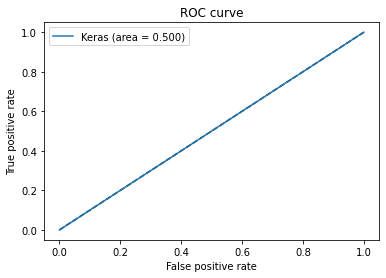

0.9240625


In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc,classification_report, confusion_matrix 
import matplotlib.pyplot as plt
y_pred = model.predict_classes(X_test, verbose=0)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds_keras = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
print("AUC : ", auc)
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
#plt.savefig("../images/ROC/ROC_d3.png")
plt.show()
print(accuracy_score(y_test, y_pred ))

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix 

model_svm=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

model_svm.fit(X_train,y_train)
y_pred = model_svm.predict(X_test)
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import roc_curve
roc = roc_curve(model_svm.predict_proba(X_test, y_test))
print(roc)

In [36]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)


#create a model
model=Sequential()
model.add(Dense(28,input_dim=212,activation='relu'))
model.add(Dense(28,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#compile model
optimizer = SGD(lr=0.1, momentum=0.2)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=10, verbose=1)
#history = model.fit(X_train, Y_train, batch_size=32, epochs=100,validation_data=(X_val, Y_val))#specify the validation set
# list all data in history

print(history.history.keys())

Epoch 1/50
2010/2010 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.9173 - val_loss: nan - val_accuracy: 0.9301
Epoch 2/50
2010/2010 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.9295 - val_loss: nan - val_accuracy: 0.9301
Epoch 3/50
2010/2010 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.9270 - val_loss: nan - val_accuracy: 0.9301
Epoch 4/50
2010/2010 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.9270 - val_loss: nan - val_accuracy: 0.9301
Epoch 5/50
2010/2010 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.9262 - val_loss: nan - val_accuracy: 0.9301
Epoch 6/50
2010/2010 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.9269 - val_loss: nan - val_accuracy: 0.9301
Epoch 7/50
2010/2010 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.9279 - val_loss: nan - val_accuracy: 0.9301
Epoch 8/50
2010/2010 [============

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     14785
           1       0.00      0.00      0.00      1215

   micro avg       0.92      0.92      0.92     16000
   macro avg       0.46      0.50      0.48     16000
weighted avg       0.85      0.92      0.89     16000

AUC :  0.5


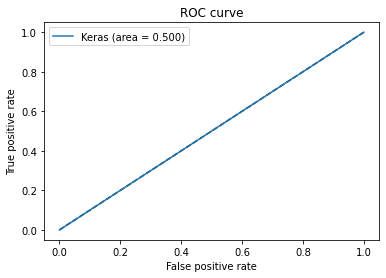

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc,classification_report, confusion_matrix 
import matplotlib.pyplot as plt
y_pred = model.predict_classes(X_test, verbose=0)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds_keras = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
print("AUC : ", auc)
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
#plt.savefig("../images/ROC/ROC_d3.png")
plt.show()

In [38]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)


#create a model
model=Sequential()
model.add(Dense(56,input_dim=212,activation='relu'))
model.add(Dense(56,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#compile model
optimizer = SGD(lr=0.1, momentum=0.2)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=10, verbose=1)
#history = model.fit(X_train, Y_train, batch_size=32, epochs=100,validation_data=(X_val, Y_val))#specify the validation set

Epoch 1/150
2010/2010 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.9242 - val_loss: nan - val_accuracy: 0.9301
Epoch 2/150
2010/2010 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.9271 - val_loss: nan - val_accuracy: 0.9301
Epoch 3/150
2010/2010 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.9266 - val_loss: nan - val_accuracy: 0.9301
Epoch 4/150
2010/2010 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.9248 - val_loss: nan - val_accuracy: 0.9301
Epoch 5/150
2010/2010 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.9281 - val_loss: nan - val_accuracy: 0.9301
Epoch 6/150
2010/2010 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.9264 - val_loss: nan - val_accuracy: 0.9301
Epoch 7/150
2010/2010 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.9275 - val_loss: nan - val_accuracy: 0.9301
Epoch 8/150
2010/2010 [====

2010/2010 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.9273 - val_loss: nan - val_accuracy: 0.9301
Epoch 118/150
2010/2010 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.9299 - val_loss: nan - val_accuracy: 0.9301
Epoch 119/150
2010/2010 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.9263 - val_loss: nan - val_accuracy: 0.9301
Epoch 120/150
2010/2010 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.9303 - val_loss: nan - val_accuracy: 0.9301
Epoch 121/150
2010/2010 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.9285 - val_loss: nan - val_accuracy: 0.9301
Epoch 122/150
2010/2010 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.9256 - val_loss: nan - val_accuracy: 0.9301
Epoch 123/150
2010/2010 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.9301 - val_loss: nan - val_accuracy: 0.9301
Epoch 124/150
2010/2010 [==

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     14785
           1       0.00      0.00      0.00      1215

   micro avg       0.92      0.92      0.92     16000
   macro avg       0.46      0.50      0.48     16000
weighted avg       0.85      0.92      0.89     16000

AUC :  0.5


C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


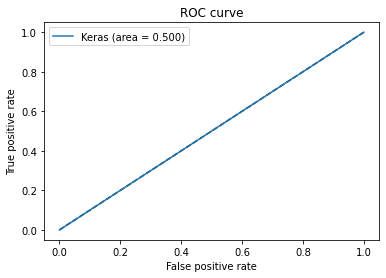

In [39]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc,classification_report, confusion_matrix 
import matplotlib.pyplot as plt
y_pred = model.predict_classes(X_test, verbose=0)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds_keras = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
print("AUC : ", auc)
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
#plt.savefig("../images/ROC/ROC_d3.png")
plt.show()

In [40]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)


#create a model
model=Sequential()
model.add(Dense(56,input_dim=212,activation='relu'))
model.add(Dense(56,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#compile model
optimizer = SGD(lr=0.01, momentum=0.2)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=10, verbose=1)
#history = model.fit(X_train, Y_train, batch_size=32, epochs=100,validation_data=(X_val, Y_val))#specify the validation set

Epoch 1/150
2010/2010 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.9237 - val_loss: nan - val_accuracy: 0.9301
Epoch 2/150
2010/2010 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.9241 - val_loss: nan - val_accuracy: 0.9301
Epoch 3/150
2010/2010 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.9288 - val_loss: nan - val_accuracy: 0.9301
Epoch 4/150
2010/2010 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.9261 - val_loss: nan - val_accuracy: 0.9301
Epoch 5/150
2010/2010 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.9301 - val_loss: nan - val_accuracy: 0.9301
Epoch 6/150
2010/2010 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.9256 - val_loss: nan - val_accuracy: 0.9301
Epoch 7/150
2010/2010 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.9288 - val_loss: nan - val_accuracy: 0.9301
Epoch 8/150
2010/2010 [====

2010/2010 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.9247 - val_loss: nan - val_accuracy: 0.9301
Epoch 118/150
2010/2010 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.9260 - val_loss: nan - val_accuracy: 0.9301
Epoch 119/150
2010/2010 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.9259 - val_loss: nan - val_accuracy: 0.9301
Epoch 120/150
2010/2010 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.9257 - val_loss: nan - val_accuracy: 0.9301
Epoch 121/150
2010/2010 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.9238 - val_loss: nan - val_accuracy: 0.9301
Epoch 122/150
2010/2010 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.9265 - val_loss: nan - val_accuracy: 0.9301
Epoch 123/150
2010/2010 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.9272 - val_loss: nan - val_accuracy: 0.9301
Epoch 124/150
2010/2010 [==

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     14785
           1       0.00      0.00      0.00      1215

   micro avg       0.92      0.92      0.92     16000
   macro avg       0.46      0.50      0.48     16000
weighted avg       0.85      0.92      0.89     16000

AUC :  0.5


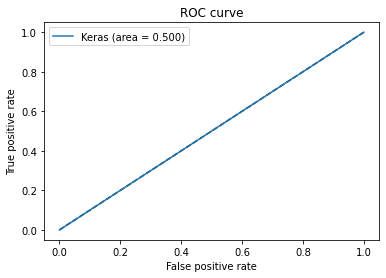

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc,classification_report, confusion_matrix 
import matplotlib.pyplot as plt
y_pred = model.predict_classes(X_test, verbose=0)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds_keras = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
print("AUC : ", auc)
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
#plt.savefig("../images/ROC/ROC_d3.png")
plt.show()

In [54]:
print(accuracy_score(y_test, y_pred ))

0.9240625


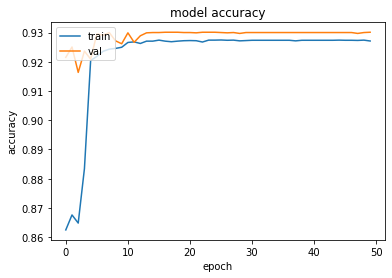

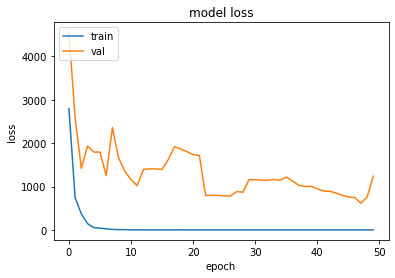

In [29]:
# summarize history for accuracy for training vs validation dataset
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [42]:
# Testing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

estimatorsk = [('scale', StandardScaler()), ('rfne', KNeighborsClassifier(n_neighbors=10))]
pipek = Pipeline(estimatorsk)
    


pipek.fit(X_train,y_train)
                                                                                         
print(roc_auc_score(y_test, pipek.predict_proba(X_test)[:,1]))                                                                           
          

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.5661207903127267


In [44]:
from sklearn.metrics import classification_report, confusion_matrix ,make_scorer, roc_auc_score,accuracy_score

y_pre=pipek.predict(X_test)
print(accuracy_score(y_test, y_pre ))
print(classification_report(y_test, y_pre ))  

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.923875
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     14785
           1       0.20      0.00      0.00      1215

   micro avg       0.92      0.92      0.92     16000
   macro avg       0.56      0.50      0.48     16000
weighted avg       0.87      0.92      0.89     16000



In [45]:
estimators_rf = [('scale', StandardScaler()), ('rf',RandomForestClassifier(n_estimators=200,max_depth = 10))]
pipe_rf = Pipeline(estimators_rf)
                  
pipe_rf.fit(X_train,y_train)
                                                                           
print(roc_auc_score(y_test, pipe_rf.predict_proba(X_test)[:,1]))
y_pre=pipe_rf.predict(X_test)
print(accuracy_score(y_test, y_pre ))
print(classification_report(y_test, y_pre ))  

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.7113179161952318


C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9240625
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     14785
           1       0.00      0.00      0.00      1215

   micro avg       0.92      0.92      0.92     16000
   macro avg       0.46      0.50      0.48     16000
weighted avg       0.85      0.92      0.89     16000



C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
from sklearn.ensemble import ExtraTreesClassifier

estimators_erf = [('scale', StandardScaler()), ('rf',ExtraTreesClassifier(n_estimators=200,max_depth = 10))]
pipe_erf = Pipeline(estimators_erf)
                  
pipe_erf.fit(X_train,y_train)
                                                                           
print(roc_auc_score(y_test, pipe_erf.predict_proba(X_test)[:,1]))
y_pre=pipe_erf.predict(X_test)
print(accuracy_score(y_test, y_pre ))
print(classification_report(y_test, y_pre ))  

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.6909186960981196


C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9240625
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     14785
           1       0.00      0.00      0.00      1215

   micro avg       0.92      0.92      0.92     16000
   macro avg       0.46      0.50      0.48     16000
weighted avg       0.85      0.92      0.89     16000



C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
from sklearn.linear_model import LogisticRegression
estimatorsl = [('scale', StandardScaler()), ('rfne', LogisticRegression(penalty='l2'))]
pipel = Pipeline(estimatorsl)

pipel.fit(X_train,y_train)

print(roc_auc_score(y_test, pipel.predict_proba(X_test)[:,1]))
y_pre=pipel.predict(X_test)
print(accuracy_score(y_test, y_pre ))
print(classification_report(y_test, y_pre ))  

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6419621710915441
0.9233125
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     14785
           1       0.00      0.00      0.00      1215

   micro avg       0.92      0.92      0.92     16000
   macro avg       0.46      0.50      0.48     16000
weighted avg       0.85      0.92      0.89     16000



C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [18]:
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler

estimatorsl = [('scale', MinMaxScaler()), ('rfne', ComplementNB())]
pipel = Pipeline(estimatorsl)

pipel.fit(X_train,y_train)

print(roc_auc_score(y_test, pipel.predict_proba(X_test)[:,1]))

0.6151979191456138


In [52]:
from sklearn.pipeline import Pipeline

estimators = [('scale', StandardScaler()), ('rfne', NodeTransformer(n_estimators=50,max_depth=5,dimension=50)), ('logreg',LogisticRegression(max_iter=500))]
pipe_rfne = Pipeline(estimators)

pipe_rfne.fit(X_train,y_train)   

print(roc_auc_score(y_test, pipe_rfne.predict_proba(X_test)[:,1]))
y_pre=pipe_rfne.predict(X_test)
print(accuracy_score(y_test, y_pre ))
print(classification_report(y_test, y_pre ))  



C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/33 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 100.60it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.29it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 58.41it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 71.22it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 37.12it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.10it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.45it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 75.64it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 74.52it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 79.24it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.66it/s]


Computing transition probabilities:   0%|          | 0/41 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 99.40it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 70.13it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 88.03it/s]


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.93it/s]


Computing transition probabilities:   0%|          | 0/29 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 140.45it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 84.03it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.64it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 79.49it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 75.53it/s]


Computing transition probabilities:   0%|          | 0/37 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 89.77it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 73.75it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 49.36it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 48.08it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 75.53it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.44it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 70.72it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.20it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 77.16it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 66.05it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 78.12it/s]


Computing transition probabilities:   0%|          | 0/35 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 50/50 [00:00<00:00, 110.38it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 72.67it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 86.36it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 81.17it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 84.03it/s]


Computing transition probabilities:   0%|          | 0/55 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.98it/s]


Computing transition probabilities:   0%|          | 0/57 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.52it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 70.22it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.29it/s]


Computing transition probabilities:   0%|          | 0/51 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 76.22it/s]


Computing transition probabilities:   0%|          | 0/45 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 82.24it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.51it/s]


Computing transition probabilities:   0%|          | 0/61 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.85it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.21it/s]


Computing transition probabilities:   0%|          | 0/47 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 68.49it/s]


Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.50it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.63it/s]


Computing transition probabilities:   0%|          | 0/59 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 52.14it/s]


Computing transition probabilities:   0%|          | 0/49 [00:00<?, ?it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.54it/s]


0it [00:00, ?it/s]

C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

0.714485318369886


C:\Users\xg16060\Anaconda3\envs\cat_embedding\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0it [00:00, ?it/s]

0.92425
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     14785
           1       0.59      0.01      0.02      1215

   micro avg       0.92      0.92      0.92     16000
   macro avg       0.76      0.50      0.49     16000
weighted avg       0.90      0.92      0.89     16000



In [107]:
predict_w_val= pipe.predict_proba(X_val) #[np.argmax(i) for i in pipe.predict_proba(X_test)]
prediction_rf_val= pipe_rf.predict_proba(X_val) #[np.argmax(i) for i in pipe.predict_proba(X_test)]
pred_n_val = model.predict([X_val_transformed])


In [108]:
from scipy.stats import ks_2samp
from sklearn.metrics import precision_recall_curve, auc,f1_score


prec_n,rec_n,thressholds_n= precision_recall_curve(y_val,pred_n_val[:,1])
prec_w,rec_w,thressholds_w= precision_recall_curve(y_val,predict_w_val[:,1])
prec_rf,rec_rf,thressholds_rf= precision_recall_curve(y_val,prediction_rf_val[:,1])

auc_n = auc(rec_n, prec_n)
auc_w = auc(rec_w, prec_w)
auc_rf = auc(rec_rf, prec_rf)

print(auc_n,auc_w,auc_rf)

auc_n = auc(rec_n, prec_n)
auc_w = auc(rec_w, prec_w)
auc_rf = auc(rec_rf, prec_rf)

0.15517745161052224 0.19610457606891088 0.1834420061454742


In [147]:
from scipy.stats import ks_2samp
from sklearn.metrics import precision_recall_curve


prec_n,rec_n,thressholds_n= precision_recall_curve(y_val,pred_n_val[:,1])
prec_w,rec_w,thressholds_w= precision_recall_curve(y_val,predict_w_val[:,1])
prec_rf,rec_rf,thressholds_rf= precision_recall_curve(y_val,prediction_rf_val[:,1])


one
0.29654196 0.22039473684210525 0.22039473684210525
0.71998596 0.0 0.0
0.72236294 0.0 0.0
0.7575897 0.0 0.0
0.7682545 0.0 0.0
two
0.16590965732025756 0.2565789473684211 0.2565789473684211
0.5278584046985684 0.0 0.0
0.5411701947089091 0.0 0.0
0.5565642254085001 0.0 0.0
three
0.119372555545672 0.23355263157894737 0.23355263157894737
0.266087956553702 0.0 0.0
0.2670999277250111 0.0 0.0
0.3130420120356831 0.0 0.0
0.31770011211579385 0.0 0.0


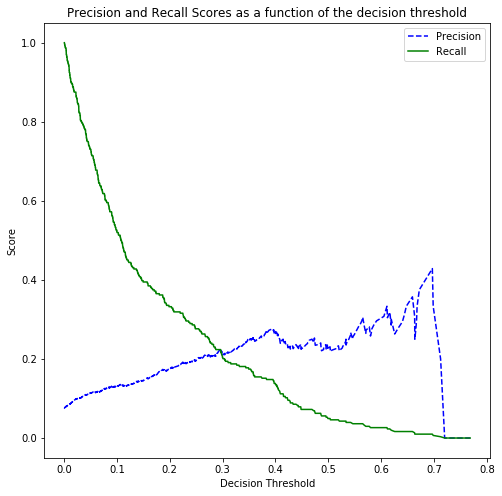

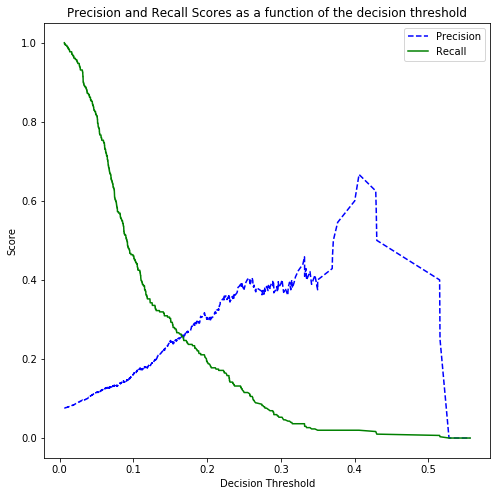

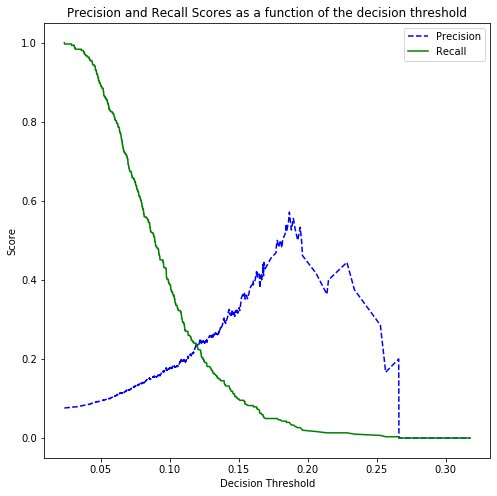

In [175]:
import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    total_benefit = 0
    save_thr = 0
    for i,ii in enumerate(thresholds):
        if precisions[i]==recalls[i]:
            print(thresholds[i],precisions[i],recalls[i])
        
        #pred= prediction[:,1]>thresholds[i]
        #benefit = np.sum(pd.DataFrame(confusion_matrix(y_test,pred)).values*cost_matrix)
        #print(pd.DataFrame(confusion_matrix(y_test,pred)).values*cost_matrix)
        #print(cost)
        
        #cost =
        #if benefit<total_benefit:
        #    total_benefit = benefit
        #    save_thr = thresholds[i]
    
    #print(total_benefit,save_thr)    
    

print('one')
plot_precision_recall_vs_threshold(prec_n,rec_n,thressholds_n)
print('two')
plot_precision_recall_vs_threshold(prec_w,rec_w,thressholds_w)
print('three')
plot_precision_recall_vs_threshold(prec_rf,rec_rf,thressholds_rf)

In [91]:
pred_n = model.predict([X_test_transformed])
pred_w = pipe.predict_proba(X_test)
prediction_rf = pipe_rf.predict_proba(X_test)

Ks_2sampResult(statistic=0.173125, pvalue=1.0774493374919007e-208)
Ks_2sampResult(statistic=0.23287500000000003, pvalue=0.0)


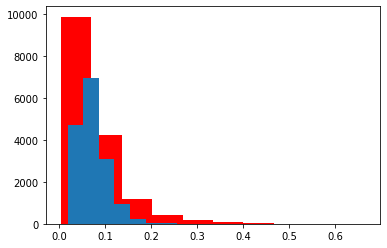

In [114]:
#plt.hist(pred_n[:,1])
plt.hist(pred_w[:,1], color="red")
plt.hist(prediction_rf[:,1])

#different distributions
print(ks_2samp(pred_n[:,1],pred_w[:,1]))
print(ks_2samp(pred_w[:,1],prediction_rf[:,1]))


In [176]:
from scipy.stats import ks_2samp
from sklearn.metrics import precision_recall_curve, auc,f1_score


prec_n_t,rec_n_t,thressholds_n= precision_recall_curve(y_test,pred_n[:,1])
prec_w_t,rec_w_t,thressholds_w= precision_recall_curve(y_test,pred_w[:,1])
prec_rf_t,rec_rf_t,thressholds_rf= precision_recall_curve(y_test,prediction_rf[:,1])

auc_n_t = auc(rec_n_t, prec_n_t)
auc_w_t = auc(rec_w_t, prec_w_t)
auc_rf_t = auc(rec_rf_t, prec_rf_t)


auc_n_t = auc(rec_n_t, prec_n_t)
auc_w_t = auc(rec_w_t, prec_w_t)
auc_rf_t = auc(rec_rf_t, prec_rf_t)
print(auc_n_t,auc_w_t,auc_rf_t)

0.15284925090292814 0.18577396335729407 0.17583409672753691


In [173]:
prd = (prediction_rf[:,1]>0.02)
prd2 = (pred_w[:,1]>0.006)
prd3 = (pred_n[:,1]>0.06)

In [276]:
print(np.quantile(prediction_rf[:,1],0.95))
print(np.quantile(predict_w[:,1],0.95))
np.quantile(pred_n[:,1],0.95)

0.16222020851534572


0.21154905706644048

In [174]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

print(confusion_matrix(y_test,prd))
print(confusion_matrix(y_test,prd2))
print(confusion_matrix(y_test,prd3))

print(classification_report(y_test,prd))

print(classification_report(y_test,prd2))
print(classification_report(y_test,prd3))


interval = 1.96 * np.sqrt( (0.22 * (1 - 0.22)) / 1215)
print(interval)

[[    6 14779]
 [    0  1215]]
[[   37 14748]
 [    0  1215]]
[[8545 6240]
 [ 387  828]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00     14785
           1       0.08      1.00      0.14      1215

    accuracy                           0.08     16000
   macro avg       0.54      0.50      0.07     16000
weighted avg       0.93      0.08      0.01     16000

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     14785
           1       0.08      1.00      0.14      1215

    accuracy                           0.08     16000
   macro avg       0.54      0.50      0.07     16000
weighted avg       0.93      0.08      0.02     16000

              precision    recall  f1-score   support

           0       0.96      0.58      0.72     14785
           1       0.12      0.68      0.20      1215

    accuracy                           0.59     16000
   macro avg       0.54      0.63      

In [167]:
# Example of calculating the mcnemar test
import numpy as np
from mlxtend.evaluate import mcnemar_table



# The correct target (class) labels
y_target = np.array(y_test)

# Class labels predicted by model 1
y_model1 = np.array(prd)

# Class labels predicted by model 2
y_model2 = np.array(prd2)

tb = mcnemar_table(y_target=y_target, 
                   y_model1=y_model1, 
                   y_model2=y_model2)

print(tb)


from statsmodels.stats.contingency_tables import mcnemar
# define contingency table
table = tb
# calculate mcnemar test
result = mcnemar(table, exact=True)
# summarize the finding
print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))
# interpret the p-value
alpha = 0.05
if result.pvalue > alpha:
	print('Same proportions of errors (fail to reject H0)')
else:
	print('Different proportions of errors (reject H0)')





[[8676  684]
 [2993 3647]]
statistic=684.000, p-value=0.000
Different proportions of errors (reject H0)


In [8]:
from sklearn.ensemble import StackingClassifier
from NodeTransformer import NodeTransformer

estimators = [('scale', StandardScaler()), ('rfne', NodeTransformer(n_estimators=200,max_depth=6,dimension=10)), ('logreg',LogisticRegression())]
pipe = Pipeline(estimators)

ests = [('rf', RandomForestClassifier(n_estimators=200, max_depth=6, random_state=0)),
  ('rf2', pipe)]

clf = StackingClassifier(estimators=ests, final_estimator=LogisticRegression())

clf.fit(X_train,y_train)   

print(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 72.24it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 59.90it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 74.38it/s]


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance at

Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 80.79it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 63.54it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 60.99it/s]


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 44.09it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 61.74it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 71.72it/s]


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 69.88it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.22it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 77.13it/s]


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 47.70it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 95.13it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.52it/s]


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 55.21it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 76.08it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:00<00:00, 56.33it/s]


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



0.9170832435130872


In [15]:
est0 = clf.estimators_[0]
est1 = clf.estimators_[1]

est0.feature_importances_

importances = est0.feature_importances_
std = np.std([tree.feature_importances_ for tree in est0.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))



#print(roc_auc_score(y_test, est1.predict_proba(X_test)[:,1]))

Feature ranking:
1. feature 3 (0.407734)
2. feature 40 (0.195840)
3. feature 5 (0.052937)
4. feature 24 (0.047776)
5. feature 0 (0.040549)
6. feature 41 (0.032069)
7. feature 27 (0.030850)
8. feature 34 (0.029743)
9. feature 6 (0.027470)
10. feature 38 (0.020344)
11. feature 37 (0.016580)
12. feature 1 (0.013039)
13. feature 2 (0.011730)
14. feature 35 (0.011391)
15. feature 4 (0.006508)
16. feature 33 (0.006252)
17. feature 25 (0.004801)
18. feature 14 (0.004457)
19. feature 18 (0.004182)
20. feature 28 (0.003650)
21. feature 32 (0.003467)
22. feature 29 (0.003304)
23. feature 19 (0.003260)
24. feature 7 (0.003104)
25. feature 11 (0.002539)
26. feature 21 (0.001991)
27. feature 36 (0.001978)
28. feature 39 (0.001820)
29. feature 20 (0.001301)
30. feature 10 (0.001085)
31. feature 30 (0.001082)
32. feature 22 (0.001012)
33. feature 15 (0.000951)
34. feature 26 (0.000948)
35. feature 16 (0.000842)
36. feature 13 (0.000737)
37. feature 31 (0.000704)
38. feature 12 (0.000557)
39. feature 

Feature: 0, Score: -0.15754
Feature: 1, Score: 0.28134
Feature: 2, Score: -0.18956
Feature: 3, Score: 0.39139
Feature: 4, Score: 0.71407
Feature: 5, Score: 0.40136
Feature: 6, Score: -0.32701
Feature: 7, Score: 0.14720
Feature: 8, Score: 0.48775
Feature: 9, Score: -0.27087
Feature: 10, Score: -0.36481
Feature: 11, Score: 0.06097
Feature: 12, Score: -0.53173
Feature: 13, Score: -0.00765
Feature: 14, Score: -0.60395
Feature: 15, Score: 0.05479
Feature: 16, Score: 0.00957
Feature: 17, Score: -0.10476
Feature: 18, Score: -0.11898
Feature: 19, Score: -0.31841
Feature: 20, Score: 0.54234
Feature: 21, Score: 0.52077
Feature: 22, Score: -0.44968
Feature: 23, Score: 0.07379
Feature: 24, Score: -0.04465
Feature: 25, Score: 0.10182
Feature: 26, Score: 0.61248
Feature: 27, Score: -0.29055
Feature: 28, Score: 0.47508
Feature: 29, Score: -0.11496
Feature: 30, Score: 0.99954
Feature: 31, Score: -0.41253
Feature: 32, Score: 0.21990
Feature: 33, Score: 0.05971
Feature: 34, Score: -0.19968
Feature: 35, 

Feature: 1830, Score: -0.79583
Feature: 1831, Score: 0.07383
Feature: 1832, Score: -0.36620
Feature: 1833, Score: -0.22772
Feature: 1834, Score: 0.15019
Feature: 1835, Score: -0.17918
Feature: 1836, Score: -0.73625
Feature: 1837, Score: -0.36572
Feature: 1838, Score: 0.73540
Feature: 1839, Score: -0.15285
Feature: 1840, Score: -0.30518
Feature: 1841, Score: -0.30138
Feature: 1842, Score: 0.18129
Feature: 1843, Score: -0.92305
Feature: 1844, Score: 0.22028
Feature: 1845, Score: 0.07748
Feature: 1846, Score: -0.28012
Feature: 1847, Score: 1.04131
Feature: 1848, Score: 0.04332
Feature: 1849, Score: -0.28889
Feature: 1850, Score: -0.70974
Feature: 1851, Score: -0.49637
Feature: 1852, Score: -0.26933
Feature: 1853, Score: -1.00655
Feature: 1854, Score: 0.62960
Feature: 1855, Score: -0.57297
Feature: 1856, Score: -0.06008
Feature: 1857, Score: 0.93913
Feature: 1858, Score: -0.45340
Feature: 1859, Score: -0.49031
Feature: 1860, Score: -0.10225
Feature: 1861, Score: -0.35138
Feature: 1862, Sco

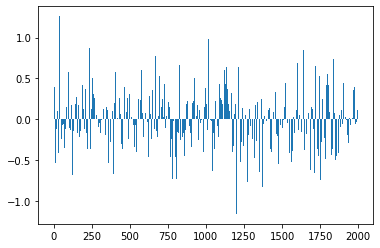

In [23]:
import matplotlib.pyplot as pyplot


importance = est1.steps[2][1].coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()




In [125]:
from NodeTransformerExtremeTrees import NodeTransformerExtremeTrees

estimators = [('scale', StandardScaler()), ('rfne', NodeTransformerExtremeTrees(n_estimators=200,max_depth=7,dimension=10)), ('logreg',LogisticRegression())]
pipee = Pipeline(estimators)

pipee.fit(X_train,y_train)   

print(roc_auc_score(y_test, pipee.predict_proba(X_test)[:,1]))

Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.94it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 36.30it/s]


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:01<00:00, 30.06it/s]


C:\Users\Stefano\.conda\envs\base2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



0.9075927417677381
